In [1]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"
res = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/results"

In [2]:
import pandas as pd
import os

## Medication Patient Data

In [7]:
mapping_inhumane = pd.read_csv(os.path.join("/Users/yanpavan/Downloads/temp_mapping_140722_partial - temp_mapping_140722_partial.csv"))

## Filter Meds

### Med 1

In [3]:
# Male, Female, 50-100, WHITE

In [4]:
gender = "MF"
age_b = 50
age_a = 100
ethnicity = "WHITE"
stratify_prefix = f"{age_b}-{age_a}_{gender}_{ethnicity}"


In [6]:
med1 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized.csv"))

In [7]:
h_adm_1 = med1.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
med1 = med1[med1.HADM_ID.isin(h_adm_1)]

In [8]:
med1 = med1.drop(columns=["Unnamed: 0"])

In [9]:
med1 = med1[med1["AGE"]>=age_b]
med1 = med1[med1["AGE"]<=age_a]

In [10]:
# med1 = med1[med1["GENDER"]==gender]
med1 = med1[med1["ETHNICITY"]==ethnicity]

In [11]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,226361,149546,269035.0,2155-02-03 23:00:00,2155-02-03 23:01:00,...,Pre-Admission Intake,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:45:00,80.0
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Pantoprazole (Protonix),Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 04:34:00,80.0
2,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Solution,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:34:00,80.0
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 04:35:00,80.0
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,Packed Red Blood Cells,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:08:00,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323002,44128,2098-07-25,M,NaN,0,225166,141304,253669.0,2149-06-11 02:25:00,2149-06-11 19:59:00,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,3 days 04:38:00,51.0
323003,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 10:43:00,51.0
323004,44128,2098-07-25,M,NaN,0,225834,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,K Phos,K Phos,metavision,inputevents_mv,Medications,mmol,Solution,NaN,3 days 10:43:00,51.0
323005,44128,2098-07-25,M,NaN,0,223258,141304,253669.0,2149-06-12 14:40:00,2149-06-12 14:41:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 23:20:00,51.0


In [12]:
d_m_l_doc = pd.read_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc.csv")).drop(columns=["Unnamed: 0"])

In [13]:
dict_d_m_l = d_m_l_doc.to_dict("records")
res_dict_mapping_med = {
    v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']
}

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/109719822.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']


In [14]:
med1["MIMICExtractLabel"] = med1.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [15]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
0,249,2075-03-13,F,NaN,0,226361,149546,269035.0,2155-02-03 23:00:00,2155-02-03 23:01:00,...,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:45:00,80.0,Pre-Admission Intake
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 04:34:00,80.0,Pantoprazole
2,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:34:00,80.0,Solution
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 04:35:00,80.0,Insulin - Regular
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:08:00,80.0,Packed Red Blood Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323002,44128,2098-07-25,M,NaN,0,225166,141304,253669.0,2149-06-11 02:25:00,2149-06-11 19:59:00,...,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,3 days 04:38:00,51.0,Potassium Chloride
323003,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 10:43:00,51.0,NaCl 0.9%
323004,44128,2098-07-25,M,NaN,0,225834,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,K Phos,metavision,inputevents_mv,Medications,mmol,Solution,NaN,3 days 10:43:00,51.0,K Phos
323005,44128,2098-07-25,M,NaN,0,223258,141304,253669.0,2149-06-12 14:40:00,2149-06-12 14:41:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 23:20:00,51.0,Insulin - Regular


In [16]:
"Calcium Gluconate" in med1.MIMICExtractLabel, "Calcium Gluconate" in med1.LABEL

(False, False)

### Med 2

In [17]:
med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/27638116.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))


In [18]:
h_adm_2 = med2.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
adm_2 = med2[med2.HADM_ID.isin(h_adm_2)]

In [19]:
med2 = med2.drop(columns=["Unnamed: 0"])

In [20]:
med2 = med2[med2["AGE"]>=age_b]
med2 = med2[med2["AGE"]<=age_a]

In [21]:
# med2 = med2[med2["GENDER"]==gender]
med2 = med2[med2["ETHNICITY"]==ethnicity]

In [22]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:23:00,2155-02-04 05:31:00,...,Packed Red Blood Cells,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:15:00,80.0
1,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 05:52:00,2155-02-04 05:53:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 09:37:00,80.0
2,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Pantoprazole (Protonix),Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 15:45:00,80.0
3,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Solution,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 15:45:00,80.0
4,249,2075-03-13,F,NaN,0,226452,149546,269035.0,2155-02-04 17:00:00,2155-02-04 17:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 20:45:00,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237602,44128,2098-07-25,M,NaN,0,220949,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Dextrose 5%,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 00:58:00,51.0
237603,44128,2098-07-25,M,NaN,0,225850,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Cefazolin,Cefazolin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,3 days 00:58:00,51.0
237604,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:00:00,2149-06-12 06:00:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 14:39:00,51.0
237605,44128,2098-07-25,M,NaN,0,225823,141304,253669.0,2149-06-12 06:00:00,2149-06-12 19:16:00,...,D5 1/2NS,D5 1/2NS,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 03:55:00,51.0


In [23]:
med2["MIMICExtractLabel"] = med2.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [24]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
0,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:23:00,2155-02-04 05:31:00,...,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:15:00,80.0,Packed Red Blood Cells
1,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 05:52:00,2155-02-04 05:53:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 09:37:00,80.0,Insulin - Regular
2,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 15:45:00,80.0,Pantoprazole
3,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 12:00:00,2155-02-04 12:01:00,...,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 15:45:00,80.0,Solution
4,249,2075-03-13,F,NaN,0,226452,149546,269035.0,2155-02-04 17:00:00,2155-02-04 17:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 20:45:00,80.0,PO Intake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237602,44128,2098-07-25,M,NaN,0,220949,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 00:58:00,51.0,Dextrose 5%
237603,44128,2098-07-25,M,NaN,0,225850,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Cefazolin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,3 days 00:58:00,51.0,Cefazolin
237604,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:00:00,2149-06-12 06:00:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 14:39:00,51.0,NaCl 0.9%
237605,44128,2098-07-25,M,NaN,0,225823,141304,253669.0,2149-06-12 06:00:00,2149-06-12 19:16:00,...,D5 1/2NS,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 03:55:00,51.0,D5 1/2NS


## Filter Labs

In [25]:
# labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_patient_data_mimic_extract_2.csv"))
# labs = labs.rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

In [26]:
# (0,5), (1, 6), 

Text(0.5, 1.0, 'Distribution of age')

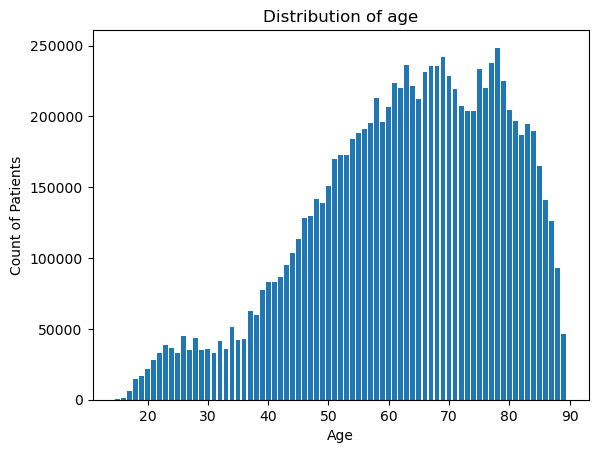

In [27]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [28]:
labs = labs.drop(columns=["Unnamed: 0"])
labs
# 8874120

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
0,100001.0,2117-09-11 11:46:00,2117-09-11 15:50:00,1.9,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,1.9,mg/dL
1,100001.0,2117-09-11 11:46:00,2117-09-11 19:31:00,2.0,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.0,mg/dL
2,100001.0,2117-09-11 11:46:00,2117-09-11 19:31:00,32.2,Hematocrit,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220545,ENGL,DIVORCED,PROTESTANT QUAKER,58526,32.2,%
3,100001.0,2117-09-11 11:46:00,2117-09-12 00:17:00,1.9,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,1.9,mg/dL
4,100001.0,2117-09-11 11:46:00,2117-09-12 04:36:00,2.0,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.0,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844609,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl
9844610,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
9844611,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L
9844612,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL


In [29]:
labs = labs[labs.HADM_ID.isin(h_adm_1+h_adm_2)]

In [30]:
labs = labs[labs["AGE"]>=age_b]
labs = labs[labs["AGE"]<=age_a]

In [31]:
# labs = labs[labs["GENDER"]==gender]
labs = labs[labs["ETHNICITY"]==ethnicity]

In [32]:
labs.shape

(2071134, 31)

Text(0.5, 1.0, 'Distribution of age')

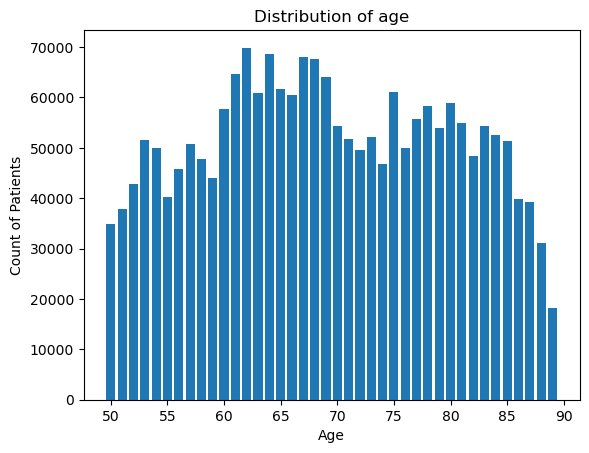

In [33]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [35]:
import pickle
final_mapping_lab_itemids = pickle.load(open("/Users/yanpavan/Desktop/d.pkl", "rb"))

In [36]:
final_itemids_list = list(final_mapping_lab_itemids.keys())

## Pairs

In [34]:
counts = med1.groupby(["MIMICExtractLabel"]).count()[["HADM_ID"]].sort_values("HADM_ID", ascending=False)
counts

,HADM_ID
MIMICExtractLabel,
NaCl 0.9%,8808
Dextrose 5%,7715
PO Intake,7433
Solution,6027
Magnesium Sulfate,5013
...,...
Aminophylline,1
Boost Glucose Control (3/4),1
Peptamen 1.5 (3/4),1


In [35]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [36]:
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
238,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,1.9,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,1.9,mg/dL
239,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,21.3,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,21.3,%
240,100003.0,2150-04-17 15:34:00,2150-04-17 21:04:00,28.0,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,28.0,%
241,100003.0,2150-04-17 15:34:00,2150-04-18 03:20:00,31.8,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,31.8,%
242,100003.0,2150-04-17 15:34:00,2150-04-18 06:25:00,2.1,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,2.1,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844609,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl
9844610,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
9844611,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L
9844612,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL


In [37]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
med2["ADMITTIME"] = pd.to_datetime(med2["ADMITTIME"])
med2["MedTimeFromAdmit"] = med2["ENDTIME"]-med2["ADMITTIME"]
labs["CHARTTIME"] = pd.to_datetime(labs["CHARTTIME"])
labs["ADMITTIME"] = pd.to_datetime(labs["ADMITTIME"])
labs["LabTimeFromAdmit"] = labs["CHARTTIME"]-labs["ADMITTIME"]

In [38]:
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600
labs["hours_in"] = labs["LabTimeFromAdmit"].dt.total_seconds()/3600

In [39]:
labs["MIMICExtractName"] = labs["MIMICExtractName"].apply(lambda r: r.strip())
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM,LabTimeFromAdmit,hours_in
238,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,1.9,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,1.9,mg/dL,0 days 03:07:00,3.116667
239,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,21.3,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,21.3,%,0 days 03:07:00,3.116667
240,100003.0,2150-04-17 15:34:00,2150-04-17 21:04:00,28.0,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,28.0,%,0 days 05:30:00,5.500000
241,100003.0,2150-04-17 15:34:00,2150-04-18 03:20:00,31.8,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,31.8,%,0 days 11:46:00,11.766667
242,100003.0,2150-04-17 15:34:00,2150-04-18 06:25:00,2.1,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,2.1,mg/dL,0 days 14:51:00,14.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844609,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl,5 days 02:51:00,122.850000
9844610,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL,5 days 02:51:00,122.850000
9844611,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L,5 days 02:51:00,122.850000
9844612,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL,5 days 02:51:00,122.850000


In [40]:
lab_unique_names = labs[labs.HADM_ID.isin(med1.HADM_ID.unique())]["MIMICExtractName"].unique()
lab_unique_names

array(['Magnesium', 'Hematocrit', 'Albumin', 'Creatinine', 'Bilirubin',
       'Potassium', 'Hemoglobin', 'Lipase', 'Glucose',
       'Alanine aminotransferase', 'Sodium', 'Platelets',
       'Asparate aminotransferase', 'Prothrombin time INR', 'PTT',
       'Calcium', 'Calcium ionized', 'Potassium serum', 'Lactic acid',
       'Hemoglobin percent', 'Glucose urine', 'Amylase',
       'Creatinine urine', 'Potassium, Urine', 'Sodium, Urine',
       'Vitamin B12', 'Uric Acid', 'Calcium urine', 'Glucose, CSF',
       'Amylase, Body Fluid', 'Amylase, Ascites', 'Creatinine ascites',
       'Glucose, Ascites', 'Bilirubin, Total, Ascites',
       'Uric Acid, Urine', 'Red blood cell', 'Sodium, Stool',
       'Glucose, Pleural', 'Glucose, Body Fluid', 'Amylase, Pleural',
       'Creatinine pleural', 'Magnesium, Urine', 'Creatinine body fluid',
       'Potassium, Stool', 'Bilirubin, Total, Pleural', 'Large Platelets',
       'Bilirubin, Total, Body Fluid', 'Hemoglobin C', 'Hemoglobin F',
       '

In [41]:
# mimic_extract_map = pd.read_csv(os.path.join("/Users/yanpavan/Desktop/", "itemid_to_variable_map.csv"))
# mimic_extract_map_small = mimic_extract_map[["LEVEL2", "MIMIC LABEL", "ITEMID"]]
# lab_names = [k.lower() for k in d_m_l_doc.groupby("lab result").count()[["Medication"]].reset_index()["lab result"].to_list()]
# res_dict = {}
# for l in lab_names:
#     res_dict[l.lower().strip()] = mimic_extract_map_small[mimic_extract_map_small.apply(lambda r: l.lower() in str(r["MIMIC LABEL"]).lower(), axis=1)].dropna()
# lab_itemids, lab_labels = {}, {}
# for l in res_dict:
#     if res_dict[l].shape[0]>0:
#         lab_labels[l] = res_dict[l].groupby("LEVEL2")["MIMIC LABEL"].apply(list).to_dict()
#         lab_itemids[l] = res_dict[l].groupby("LEVEL2")["ITEMID"].apply(list).to_dict()   
# del lab_itemids['ast']['Diastolic blood pressure']     
# import pickle
# v_r_lab_dict = pickle.load(open(os.path.join(data, "mapping_lab_itemids.pkl"), "rb"))
# temp_itemids_list = {k: [i for l in list(v.values()) for i in l] for k, v in lab_itemids.items()}
# for l in v_r_lab_dict:
#     if l.lower().strip() in temp_itemids_list:
#         items = [k[1] for k in v_r_lab_dict[l]]
#         names = [k[0] for k in v_r_lab_dict[l]]
#         diff = list(set(items).difference(set(temp_itemids_list[l.lower().strip()])))
#         if len(diff)>0:
#             for k in diff:
#                lab_itemids[l.lower().strip()][names[items.index(k)]] = [k]
#     else:
#         for l1 in v_r_lab_dict[l]:
#             if l1[0] not in lab_itemids:
#                 lab_itemids[l1[0]] = {}
#                 lab_itemids[l1[0]][l1[0]] = [l1[1]]


In [42]:
# d_m_l_doc["lab result"].value_counts()

In [11]:
t_lab_itemids = {'ALT': {'Alanine aminotransferase': [50861, 769, 220644]},
 'ANA': {'Fraction inspired oxygen': [189]},
 'AST': {'Asparate aminotransferase': [50878, 770, 220587]},
 'Hemoglobin': {'Hemoglobin percent': [50852],
  'Hemoglobin C': [51224],
  'Hemoglobin F': [51225],
  'Hemoglobin A2': [51223],
  'Hemoglobin': [814, 220228, 51222, 50811]},
 'INR': {'Prothrombin time INR': [51237, 815, 1530, 227467]},
 'bilirubin': {'Bilirubin': [51465,
   50883,
   803,
   225651,
   50885,
   1538,
   848,
   225690,
   50884],
#   'Bilirubin, Total, Pleural': [51049],
#   'Bilirubin, Total, Body Fluid': [51028],
#   'Bilirubin, Total, Ascites': [50838]
  },
 'calcium': {'Calcium': [786, 1522, 3746, 51029, 50893, 225625],
  'Calcium ionized': [50808, 816, 225667, 3766],
#   'Calcium urine': [51066, 51077]
  },
 'creatinine': {'Creatinine': [791, 1525, 220615, 50912],
  'Creatinine ascites': [50841],
#   'Creatinine body fluid': [51032],
#   'Creatinine pleural': [51052],
#   'Creatinine urine': [51082]
},
 'glucose': {'Glucose': [50931,
   807,
   811,
   1529,
   50809,
   3745,
   225664,
   220621,
   226537],
#   'Glucose urine': [51478],
#   'Glucose, CSF': [51014],
#   'Estimated Actual Glucose': [51529],
#   'Glucose, Urine': [51084],
#   'Glucose, Pleural': [51053],
#   'Glucose, Joint Fluid': [51022],
#   'Glucose, Ascites': [50842],
#   'Glucose, Body Fluid': [51034]
},
 'lactic acid': {'Lactic acid': [818, 225668, 1531]},
 'magnesium': {'Magnesium': [50960], 'Magnesium, Urine': [51088]},
 'platelets': {'Platelets': [51265, 828, 227457], 'Large Platelets': [51240]},
 'potassium': {'Potassium': [829, 1535, 227464, 50971, 50822],
#   'Potassium serum': [227442],
#   'Potassium, Body Fluid': [51041],
#   'Potassium, Pleural': [51057],
#   'Potassium, Stool': [51064],
#   'Potassium, Urine': [51097],
#   'Potassium, Ascites': [50847]
  },
 'sodium': {'Sodium': [837, 1536, 220645, 226534, 50983, 50824],
#   'Sodium, Ascites': [50848],
#   'Sodium, Body Fluid': [51042],
#   'Sodium, Pleural': [51058],
#   'Sodium, Stool': [51065],
#   'Sodium, Urine': [51100]
  },
 'Uric acid': {'Uric Acid': [51007], 'Uric Acid, Urine': [51105]},
 'B12': {'Vitamin B12': [51010]},
 'prolactin': {'Prolactin': [50973]},
 'Amylase': {'Amylase': [50867], 
#  'Amylase, Ascites': [50836], 'Amylase, Body Fluid': [51026],'Amylase, Joint Fluid': [51020],'Amylase, Pleural': [51047], 'Amylase, Urine': [51072]
 },
 'Lipase': {'Lipase': [50956], 
#  'Lipase, Ascites': [50844], 'Lipase, Body Fluid': [51036]
 },
 'Aptt': {'PTT': [825, 1533, 227466, 51275]}}
t_lab_itemids['Hematocrit']  = {
    'Hematocrit' : [813, 220545, 51221, 50810]
}
t_lab_itemids['Red blood cell'] = {
    'Red blood cell': [51279, 833]
}
t_lab_itemids['Albumin'] = {
    'Albumin': [50862, 772, 1521, 227456]
}
t_lab_itemids['Magnesium'] = {
    'Magnesium': [821, 1532, 220635, 50960]
}

In [12]:
t_lab_itemids.keys()

dict_keys(['ALT', 'ANA', 'AST', 'Hemoglobin', 'INR', 'bilirubin', 'calcium', 'creatinine', 'glucose', 'lactic acid', 'magnesium', 'platelets', 'potassium', 'sodium', 'Uric acid', 'B12', 'prolactin', 'Amylase', 'Lipase', 'Aptt', 'Hematocrit', 'Red blood cell', 'Albumin', 'Magnesium'])

In [14]:
map_inhum = {
    'Red blood cell':'Red Blood Cells',
    'Vitamin B12':'Vitamin B12',
    'Alanine aminotransferase':'Alanine amino transferase',
    'Asparate aminotransferase':'Aspratate aminotransferase',
    'Albumin':'Albumin',
    'Prothrombin time INR':'INR(PT)',
    'PTT':'PTT',
    'Bilirubin': 'Bilirubin',
    'Calcium':'Calcium',
    'Hematocrit':'Hematocrit',
    'Creatinine':'Creatinine',
    'Glucose':'Glocuse',
    'Magnesium':'Magnesium',
    'Platelets':'Platelet count',
    'Potassium':'Potassium',
    'Sodium':'Sodium',
    'Uric Acid':'Uric Acid'
}

In [15]:
map_inhum_r = {v:k for k,v in map_inhum.items()}

In [ ]:
mapping_inhumane.head(60)

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit
0,DIABETES_MELLITUS,NaN,diabetes_diagnosis,bd_diabetes_mellitus,NaN,background_diseases,Diabetes Mellitus,NaN,NaN,NaN,NaN,binary
1,HYPERTENSION,NaN,hypertension__diagnosis,bd_hypertension,NaN,background_diseases,Hypertension,NaN,NaN,NaN,NaN,binary
2,NaN,NaN,NaN,NaN,NaN,bloog_gas,HCO3,NaN,NaN,NaN,NaN,mmol/L
3,NaN,NaN,NaN,NaN,NaN,bloog_gas,Lacatate,NaN,NaN,0.2,15,mmol/L
4,NaN,NaN,NaN,NaN,NaN,bloog_gas,pCO2,NaN,NaN,1,150,mmHg
5,NaN,NaN,NaN,NaN,NaN,bloog_gas,pO2,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,inr,INR,coagulation_panel,INR(PT),NaN,NaN,5,50,sec
7,NaN,NaN,NaN,pt,PT,coagulation_panel,PT,NaN,NaN,NaN,NaN,%
8,NaN,NaN,NaN,ptt,PTT,coagulation_panel,PTT,NaN,NaN,5,200,sec
9,C.REACTIVE.PROTEIN,crp_30710_0,High_sensetive_CRP,crp,CRP,comp_metabolic_panel,C-Reactive Protein,0.03,5,0,1000,mg/L


In [13]:
mapping_inhumane.tail(60)

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit
45,Weight,weight_21002_0,weight,weight,Weight,demographics,Weight,30,180,30,180,kg
46,IntraOcularPressureLT,NaN,NaN,e_iop_l,NaN,eyes,Intra Ocular Pressure (left),NaN,NaN,NaN,NaN,mmHg
47,IntraOcularPressureRT,NaN,NaN,e_iop_r,NaN,eyes,Intra Ocular Pressure (right),NaN,NaN,NaN,NaN,mmHg
48,AlcoholDrinking,NaN,drink,h_alcohol,NaN,habits,Alcohol,NaN,NaN,NaN,NaN,binary
49,CurrentSmokingPackYears,NaN,h_current_pack_years,h_current_pack_years,NaN,habits,Smoking pack years (current),NaN,NaN,NaN,NaN,years
50,CurrentSmoking,NaN,h_current_smoking,h_current_smoking,NaN,habits,Current Smoking,NaN,NaN,NaN,NaN,binary
51,PastSmokingPackYears,NaN,h_past_pack_years,h_past_pack_years,NaN,habits,Smoking pack years (past),NaN,NaN,NaN,NaN,years
52,PastSmoking,NaN,h_past_smoking,h_past_smoking,NaN,habits,Past Smoking,NaN,NaN,NaN,NaN,binary
53,PhysicalActivity,NaN,h_physical_activity,h_physical_activity,NaN,habits,Physical Activity,NaN,NaN,NaN,NaN,minutes per week
54,CHOLESTEROL,cholesterol_30690_0,Cholesterol_blood,cholesterol,CHOLESTEROL,lipid_profile,Total Cholesterol,120,200,30,1000,mg/dL


In [44]:
# lab_itemids

In [45]:
# orig = ['alt',
#  'ana',
#  'ast',
#  'hemoglobin',
#  'inr',
#  'bilirubin',
#  'calcium',
#  'creatinine',
#  'glucose',
#  'lactic acid',
#  'magnesium',
#  'platelets',
#  'potassium',
#  'sodium']
# dict_lab_mapping = {
#     k:[k] for k in orig
# }


# rest = ['Uric Acid',
#  'Uric Acid, Urine',
#  'Vitamin B12',
#  'Prolactin',
#  'Amylase',
#  'Amylase, Ascites',
#  'Amylase, Body Fluid',
#  'Amylase, Joint Fluid',
#  'Amylase, Pleural',
#  'Amylase, Urine',
#  'Lipase',
#  'Lipase, Ascites',
#  'Lipase, Body Fluid']
# dict_lab_mapping["Uric acid".lower()] = ['Uric Acid', 'Uric Acid, Urine']
# dict_lab_mapping["B12".lower()] = ['Vitamin B12']
# dict_lab_mapping["prolactin".lower()] = ['Prolactin']
# dict_lab_mapping["Amylase".lower()] = [
#  'Amylase',
#  'Amylase, Ascites',
#  'Amylase, Body Fluid',
#  'Amylase, Joint Fluid',
#  'Amylase, Pleural',
#  'Amylase, Urine']
 
# dict_lab_mapping["Lipase".lower()] = ['Lipase',
#  'Lipase, Ascites',
#  'Lipase, Body Fluid']


In [46]:
# d_lab_map = {k.strip():[] for k in d_m_l_doc["lab result"].unique()}
# for i, v in lab_itemids.items():
#     if i.lower() in d_lab_map:
#         d_lab_map[i.lower()].extend(list(v.keys()))
#     elif i.strip() in d_lab_map:
#         d_lab_map[i].extend(list(v.keys()))

# d_lab_map["ALT"].extend(["Alanine aminotransferase"])
# d_lab_map["ANA"].extend(["Fraction inspired oxygen"])
# d_lab_map["AST"].extend(["Asparate aminotransferase"])
# d_lab_map["Hemoglobin"].extend(["Hemoglobin percent", "Hemoglobin C", "Hemoglobin F", "Hemoglobin A2"])
# d_lab_map["Uric acid"].extend(["Uric Acid, Urine", "Uric Acid"])
# d_lab_map["Amylase"].extend(["Amylase, Ascites", "Amylase, Body Fluid", "Amylase, Joint Fluid", "Amylase, Pleural", "Amylase, Urine"])
# d_lab_map["Lipase"].extend(["Lipase, Ascites", "Lipase, Body Fluid"])
# d_lab_map["B12"].extend(["Vitamin B12"])
# d_lab_map["INR"].extend(["Prothrombin time INR"])

In [47]:
d_lab_map = {k:list(v.keys()) for k, v in t_lab_itemids.items()}

In [48]:
d_lab_map["CPK"] = []
d_lab_map

{'ALT': ['Alanine aminotransferase'],
 'ANA': ['Fraction inspired oxygen'],
 'AST': ['Asparate aminotransferase'],
 'Hemoglobin': ['Hemoglobin percent',
  'Hemoglobin C',
  'Hemoglobin F',
  'Hemoglobin A2',
  'Hemoglobin'],
 'INR': ['Prothrombin time INR'],
 'bilirubin': ['Bilirubin'],
 'calcium': ['Calcium', 'Calcium ionized'],
 'creatinine': ['Creatinine', 'Creatinine ascites'],
 'glucose': ['Glucose'],
 'lactic acid': ['Lactic acid'],
 'magnesium': ['Magnesium', 'Magnesium, Urine'],
 'platelets': ['Platelets', 'Large Platelets'],
 'potassium': ['Potassium'],
 'sodium': ['Sodium'],
 'Uric acid': ['Uric Acid', 'Uric Acid, Urine'],
 'B12': ['Vitamin B12'],
 'prolactin': ['Prolactin'],
 'Amylase': ['Amylase'],
 'Lipase': ['Lipase'],
 'Aptt': ['PTT'],
 'Hematocrit': ['Hematocrit'],
 'Red blood cell': ['Red blood cell'],
 'Albumin': ['Albumin'],
 'Magnesium': ['Magnesium'],
 'CPK': []}

In [49]:
indexes = list(d_m_l_doc.groupby(["Medication", "lab result"]).count().index)

In [50]:
med_vals = [k[0].strip() for k in indexes]
labtest_vals = [k[1].strip() for k in indexes]

In [51]:
med1.MIMICExtractLabel.value_counts()

NaCl 0.9%                        8808
Dextrose 5%                      7715
PO Intake                        7433
Solution                         6027
Magnesium Sulfate                5013
                                 ... 
Boost Glucose Control (3/4)         1
Peptamen 1.5 (1/4)                  1
Mighty Shake (no sugar added)       1
Impact (1/4)                        1
Peptamen 1.5 (3/4)                  1
Name: MIMICExtractLabel, Length: 260, dtype: int64

In [52]:
med_vals.append('Insulin - Regular')
labtest_vals.append('glucose')

med_vals.append('Packed Red Blood Cells')
labtest_vals.append('Hemoglobin')

med_vals.append('Calcium Gluconate (CRRT)')
labtest_vals.append('calcium')

med_vals.append('Packed Red Blood Cells')
labtest_vals.append('Red blood cell')

med_vals.append('Packed Red Blood Cells')
labtest_vals.append('Hematocrit')

med_vals.append('Albumin')
labtest_vals.append('Albumin')

med_vals.append('Albumin')
labtest_vals.append('Hematocrit')

med_vals.append('Albumin 5%')
labtest_vals.append('Albumin')

med_vals.append('Albumin 5%')
labtest_vals.append('Hematocrit')

med_vals.append('Albumin 25%')
labtest_vals.append('Albumin')

med_vals.append('Albumin 25%')
labtest_vals.append('Hematocrit')

med_vals.append('Magnesium Sulfate')
labtest_vals.append('Magnesium')

In [53]:
l_med_lab = [(i[0], k) for i in zip(med_vals, labtest_vals) for k in d_lab_map[i[1]]]
labtest_vals_new = [k[1] for k in l_med_lab]
med_vals_new = [k[0] for k in l_med_lab]

In [54]:
len(med_vals_new)==len(labtest_vals_new)

True

In [55]:
[i for i in zip(med_vals_new, labtest_vals_new)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin percent'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin C'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin F'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin A2'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'Platelets'),
 ('Acetylsalycilic acid (aspirin)', 'Large Platelets'),
 ('Amoxicilin-clavulanate', 'Alanine aminotransferase'),
 ('Amoxicilin-clavulanate', 'Asparate aminotransferase'),
 ('Ceftriaxone', 'Bilirubin'),
 ('Citalopram', 'Sodium'),
 ('Clozapine', 'Platelets'),
 ('Clozapine', 'Large Platelets'),
 ('Dabigatran', 'PTT'),
 ('Esmoprazole', 'Vitamin B12'),
 ('Fluoxetine', 'Sodium'),
 ('Furosemide', 'Magnesium'),
 ('Furosemide', 'Magnesium, Urine'),
 ('Glibenclamide', 'Glucose'),
 ('Glimepiride', 'Glucose'),
 ('Haloperidol', 'Prolactin'),
 ('Hydrochlorothiazide', 'Uric Acid'),
 ('Hydrochlorothiazide', 'Uric Acid, Urine'),
 ('Hydrochlorothiazide', 'Calcium'),
 ('Hydrochlorothiazide'

In [56]:
t_med1 = med1[med1["MIMICExtractLabel"].isin(med_vals_new)]
t_med2 = med2[med2["MIMICExtractLabel"].isin(med_vals_new)]

In [57]:
t_labs = labs[labs["MIMICExtractName"].isin(labtest_vals_new)]

In [58]:
t_labs.shape, labs.shape

((1988608, 33), (2071134, 33))

In [59]:
# Old - ((997, 65), (693, 64), (1319434, 39))
t_med1.shape, t_med2.shape, t_labs.shape

((23614, 65), (18037, 64), (1988608, 33))

In [60]:
med_vals

['Acetylsalycilic acid (aspirin)',
 'Acetylsalycilic acid (aspirin)',
 'Amoxicilin-clavulanate',
 'Amoxicilin-clavulanate',
 'Ceftriaxone',
 'Citalopram',
 'Clozapine',
 'Dabigatran',
 'Esmoprazole',
 'Fluoxetine',
 'Furosemide',
 'Glibenclamide',
 'Glimepiride',
 'Haloperidol',
 'Hydrochlorothiazide',
 'Hydrochlorothiazide',
 'Metformin',
 'Metformin',
 'Omeprazole',
 'Pantoprazole',
 'Paracetamole (acetaminophen)',
 'Paroxetine',
 'Procainamide',
 'Quetiapine',
 'Ramipril',
 'Rivaroxaban',
 'Simvastatin',
 'Spironolactone',
 'Trimetoprim-sulphamethoxazole',
 'Trimetoprim-sulphamethoxazole',
 'Valproic acid',
 'Valproic acid',
 'Valsartan',
 'Warfarin',
 'Insulin - Regular',
 'Packed Red Blood Cells',
 'Calcium Gluconate (CRRT)',
 'Packed Red Blood Cells',
 'Packed Red Blood Cells',
 'Albumin',
 'Albumin',
 'Albumin 5%',
 'Albumin 5%',
 'Albumin 25%',
 'Albumin 25%',
 'Magnesium Sulfate']

In [61]:
t_med1 = t_med1.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_med2 = t_med2.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_labs = t_labs.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractName":"ITEMID"})

In [62]:
for i in set(med_vals):
    bool_val = i in med1.MIMICExtractLabel.value_counts().to_dict()
    print(f"{i} - {bool_val}")

Insulin - Regular - True
Ramipril - False
Rivaroxaban - False
Albumin 25% - True
Clozapine - False
Hydrochlorothiazide - False
Dabigatran - False
Ceftriaxone - True
Pantoprazole - True
Omeprazole - True
Magnesium Sulfate - True
Quetiapine - False
Esmoprazole - False
Simvastatin - False
Furosemide - True
Paroxetine - False
Citalopram - False
Acetylsalycilic acid (aspirin) - False
Calcium Gluconate (CRRT) - True
Valproic acid - False
Glimepiride - False
Valsartan - False
Amoxicilin-clavulanate - False
Procainamide - True
Packed Red Blood Cells - True
Fluoxetine - False
Haloperidol - True
Albumin 5% - True
Paracetamole (acetaminophen) - False
Trimetoprim-sulphamethoxazole - False
Glibenclamide - False
Metformin - False
Spironolactone - False
Albumin - False
Warfarin - True


In [63]:
t_med1.ITEMID.value_counts()

Magnesium Sulfate           5013
Insulin - Regular           4528
Furosemide                  3838
Packed Red Blood Cells      2879
Pantoprazole                2865
Albumin 5%                  1407
Ceftriaxone                  819
Albumin 25%                  687
Haloperidol                  623
Omeprazole                   415
Warfarin                     336
Calcium Gluconate (CRRT)     198
Procainamide                   6
Name: ITEMID, dtype: int64

## Before After Trend Calculation

In [64]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
def check_med2(row):
    if row["HADM_ID"] in t_med2["HADM_ID"].to_list():
        if row["ITEMID"] in t_med2[t_med2["HADM_ID"]==row["HADM_ID"]]["ITEMID"].to_list():
            return True
    return False

def get_med2(row):
    temp = t_med2[t_med2["HADM_ID"]==row["HADM_ID"]] 
    return temp[temp["ITEMID"]==row["ITEMID"]].iloc[0]

In [65]:
from sklearn import datasets, linear_model, metrics

def get_normalized_trend(data):
    selected = data[['VALUENUM', 'hours_in']]
    if selected.shape[0]<2:
        return float("NaN")
    reg = linear_model.LinearRegression()
    reg.fit(np.array(data['hours_in']).reshape(-1,1), np.array(data['VALUENUM']).reshape(-1,1))
    return reg.coef_[0][0]

In [66]:
def get_normalized_trend_np(data):
    selected = data[['VALUENUM', 'hours_in']]
    print(selected)
    if selected.shape[0]<2:
        return float("NaN")
    print(np.array(data['hours_in']), np.array(data['VALUENUM']))
    t = np.polyfit(np.array(data['hours_in']), np.array(data['VALUENUM']), 1,full=True)
    coefficients, residuals, _, _, _ = t
    print(t)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    return 1

In [67]:
window = (1,25,4)

In [68]:
window_len = 1
before_windows = [(0,12), (0,6)]
after_windows = [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9), (9,10), (10,11), (11,12)]

In [69]:
def get_vals(r):

    row = r.copy()
    for b_w in before_windows:
        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        b_window_start = row["MedTimeFromAdmit"].total_seconds() - (b_w[0]*3600)
        b_window_end = row["MedTimeFromAdmit"].total_seconds() - (b_w[1])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"before_abs_{b_w}"] = {}
            row[f"before_time_{b_w}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"before_abs_{b_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"before_time_{b_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

    for a_w in after_windows:

        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        med2_bool = check_med2(row)
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        a_window_start = row["MedTimeFromAdmit"].total_seconds() + (a_w[0]*3600)
        a_window_end = row["MedTimeFromAdmit"].total_seconds() + (a_w[1])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        if med2_bool:
            med2_val = get_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
        
        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"after_abs_{a_w}"] = {}
            row[f"after_time_{a_w}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"after_abs_{a_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"after_time_{a_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
            
    return row


    # for i in range(window[0], window[1], window[2]):

        # if i==1:
        #     lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        #     b_window_start = row["MedTimeFromAdmit"].total_seconds()
        #     b_window_end = row["MedTimeFromAdmit"].total_seconds() - 1*3600
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        #     lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        #     lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        #     t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        #     val_counts_m = t[t["SUBJECT_ID"]>=1]
        #     if val_counts_m.shape[0]==0:
        #         row[f"before_abs_0_0"] = {}
        #         row[f"before_time_0_0"] = {}
        #     else:
        #         l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
        #         row[f"before_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
        #         row[f"before_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

        #     lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        #     med2_bool = check_med2(row)
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        #     a_window_start = row["MedTimeFromAdmit"].total_seconds()
        #     a_window_end = row["MedTimeFromAdmit"].total_seconds() + 3600
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        #     lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        #     lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        #     if med2_bool:
        #         med2_val = get_med2(row)
        #         lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
            
        #     t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            
        #     val_counts_m = t[t["SUBJECT_ID"]>=1]
        #     if val_counts_m.shape[0]==0:
        #         row[f"after_abs_0_0"] = {}
        #         row[f"after_time_0_0"] = {}
        #     else:
        #         l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
        #         row[f"after_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
        #         row[f"after_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

In [70]:
# type = "abs"
all_types = set(["abs", "time"])
# other_cols = [f"before_{t}_{b_w}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{b_w}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b = [f"before_{t}_{b_w}" for b_w in before_windows for t in all_types]
cols_a = [f"after_{t}_{a_w}" for a_w in after_windows for t in all_types]
# cols_b.extend([f"before_{t}_0_0" for t in all_types])
# cols_a.extend([f"after_{t}_0_0" for t in all_types])
cols = cols_b.copy()
cols.extend(cols_a)

In [73]:
# temp = t_med1.iloc[:100].apply(lambda r : get_vals(r), axis=1)

In [97]:
temp = t_med1.copy()
temp = temp.apply(lambda r : get_vals(r), axis=1)

In [98]:
temp

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,OldITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,"after_abs_(7, 8)","after_time_(7, 8)","after_abs_(8, 9)","after_time_(8, 9)","after_abs_(9, 10)","after_time_(9, 10)","after_abs_(10, 11)","after_time_(10, 11)","after_abs_(11, 12)","after_time_(11, 12)"
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,{},{},{},{},{},{},{'Hematocrit': 31.6},{'Hematocrit': 10.75},{'Glucose': 90.0},{'Glucose': 11.166666666666666}
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,{},{},{},{},{},{},{},{},{},{}
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,{},{},{},{},{},{},{},{},{},{}
5,249,2075-03-13,F,NaN,0,221794,149546,269035.0,2155-02-04 10:00:00,2155-02-04 10:01:00,...,{'Glucose': 99.0},{'Glucose': 7.983333333333333},{},{},"{'Hematocrit': 31.6, 'Potassium': 3.8, 'Sodium...","{'Hematocrit': 9.833333333333334, 'Potassium':...",{},{},{},{}
8,249,2075-03-13,F,NaN,0,222011,149546,269035.0,2155-02-05 08:49:00,2155-02-05 09:04:00,...,{},{},{},{},{},{},{},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322948,44123,2049-11-26,F,2135-01-12 00:00:00,1,225168,116395,264065.0,2135-01-06 18:24:00,2135-01-06 19:24:00,...,{},{},{},{},{},{},{},{},{},{}
322969,44123,2049-11-26,F,2135-01-12 00:00:00,1,227525,116395,264065.0,2135-01-10 11:13:00,2135-01-10 22:35:00,...,{},{},{},{},{},{},{},{},{},{}
322990,44126,2076-07-25,F,NaN,0,222011,183530,241939.0,2129-01-06 05:00:00,2129-01-06 06:00:00,...,{},{},{},{},{},{},{},{},{},{}
322997,44128,2098-07-25,M,NaN,0,221794,141304,253669.0,2149-06-11 05:35:00,2149-06-11 05:36:00,...,{},{},{},{},{},{},{},{},{},{}


In [101]:
temp.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_first_val_{stratify_prefix}_doc_eval_new_win.csv"))

In [102]:
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict"]+cols).astype({'temp':'float64'}).rename(columns={"temp":f"{col}_sp"}).dropna(subset=["LAB_ITEMID"])
    )

In [103]:
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(t_med1.columns)+["LAB_ITEMID"])

In [104]:
final = col_vals[-1][list(t_med1.columns)+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [105]:
# t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final["LAB_NAME"] = final["LAB_ITEMID"]
final = final.rename(columns={"ITEMID":"MED_NAME"})

In [106]:
final

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,OldITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,"after_abs_(7, 8)_sp","after_time_(8, 9)_sp","after_abs_(8, 9)_sp","after_time_(9, 10)_sp","after_abs_(9, 10)_sp","after_time_(10, 11)_sp","after_abs_(10, 11)_sp","after_time_(11, 12)_sp","after_abs_(11, 12)_sp",LAB_NAME
0,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Calcium
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creatinine
2,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.166667,90.0,Glucose
3,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,NaN,NaN,NaN,NaN,NaN,10.75,31.6,NaN,NaN,Hematocrit
4,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hemoglobin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287755,77614,2070-09-16,M,2153-12-18 00:00:00,1,225168,140792,251027.0,2153-10-02 14:28:00,2153-10-02 18:28:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.233333,23.8,Hematocrit
287756,77711,2056-01-27,F,NaN,0,225913,147808,224771.0,2112-02-25 16:58:00,2112-02-25 16:59:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.800000,26.0,PTT
287757,77711,2056-01-27,F,NaN,0,225913,147808,224771.0,2112-02-25 16:58:00,2112-02-25 16:59:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.800000,1.0,Prothrombin time INR
287758,43799,2120-06-13,F,NaN,0,221794,199813,278149.0,2181-07-24 21:00:00,2181-07-24 21:01:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.566667,20.9,PTT


In [107]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"

final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval_win.csv"))

In [108]:
# final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval_win.csv"))

In [109]:
t_final = final.copy()
plot_data = {}
for b in [f"{c}_sp" for c in cols_b]:
    if b in t_final.columns:
        plot_data[b] = []
        for a in [f"{c}_sp" for c in cols_a]:
            if a in t_final.columns:
                plot_data[b].append(t_final.dropna(subset=[a,b]))
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [110]:
plot_data_concat = {}
for i in plot_data:
    plot_data_concat[i] = pd.concat(plot_data[i])

In [111]:
[(k, plot_data_concat[k].shape) for k in plot_data_concat]

[('before_time_(0, 12)_sp', (422562, 95)),
 ('before_abs_(0, 12)_sp', (422562, 95)),
 ('before_time_(0, 6)_sp', (332946, 95)),
 ('before_abs_(0, 6)_sp', (332946, 95))]

In [112]:
# type1 = "abs"
a_t = ["abs", "time"]
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b_sp = [(f"before_{a_t[0]}_{b_w}_sp", f"before_{a_t[1]}_{b_w}_sp") for b_w in before_windows]
cols_a_sp = [(f"after_{a_t[0]}_{a_w}_sp", f"after_{a_t[1]}_{a_w}_sp") for a_w in after_windows]
# cols_b_sp.append((f"before_abs_0_0_sp", f"before_time_0_0_sp"))
# cols_a_sp.append((f"after_abs_0_0_sp", f"after_time_0_0_sp"))
cols_sp = cols_b_sp.copy()
cols_sp.extend(cols_a_sp)

In [113]:
t_final = final.copy()
plot_data = {}
for b in cols_b_sp:
    if b[0] in t_final.columns:
        plot_data[b[0]] = {}
        for a in cols_a_sp: 
            if a[0] in t_final.columns:
                # print(a, b)
                plot_data[b[0]][a[0]] = t_final.dropna(subset=[a[0], a[1], b[0], b[1]])
                # print(plot_data[b][a][[a, b]])
                # print(plot_data.keys())
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [114]:
plot_data.keys()

dict_keys(['before_abs_(0, 12)_sp', 'before_abs_(0, 6)_sp'])

In [115]:
import pickle
pickle.dump(plot_data, open(f"plot_bw_aw_med_lab_data_{stratify_prefix}_doc_eval_win.pkl", "wb"))

In [116]:
cols_sp

[('before_abs_(0, 12)_sp', 'before_time_(0, 12)_sp'),
 ('before_abs_(0, 6)_sp', 'before_time_(0, 6)_sp'),
 ('after_abs_(0, 1)_sp', 'after_time_(0, 1)_sp'),
 ('after_abs_(1, 2)_sp', 'after_time_(1, 2)_sp'),
 ('after_abs_(2, 3)_sp', 'after_time_(2, 3)_sp'),
 ('after_abs_(3, 4)_sp', 'after_time_(3, 4)_sp'),
 ('after_abs_(4, 5)_sp', 'after_time_(4, 5)_sp'),
 ('after_abs_(5, 6)_sp', 'after_time_(5, 6)_sp'),
 ('after_abs_(6, 7)_sp', 'after_time_(6, 7)_sp'),
 ('after_abs_(7, 8)_sp', 'after_time_(7, 8)_sp'),
 ('after_abs_(8, 9)_sp', 'after_time_(8, 9)_sp'),
 ('after_abs_(9, 10)_sp', 'after_time_(9, 10)_sp'),
 ('after_abs_(10, 11)_sp', 'after_time_(10, 11)_sp'),
 ('after_abs_(11, 12)_sp', 'after_time_(11, 12)_sp')]

In [117]:
cols_d = dict(cols_sp)

In [118]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
# corr, _ = spearmanr(values, time_diff)
p_data = {}
for k in plot_data:
    print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        print("After Window: ", k_a)

        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])        
        med_lab_pairs = t_data.index
        
        for med_lab_pair in med_lab_pairs.unique():
            
            if med_lab_pair not in p_data.keys():
                p_data[med_lab_pair] = {}
            if k not in p_data[med_lab_pair].keys():
                p_data[med_lab_pair][k] = []
            
            t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
            t_d['abs'] = t_d[k_a]-t_d[k]
            t_d['percent'] = (t_d['abs']/t_d[k])*100
            t_d['ratio'] = t_d[k_a]/t_d[k]
            t_d.replace([np.inf, -np.inf], np.nan, inplace=True)
            t_d = t_d.dropna()
            
            p_data[med_lab_pair][k].append(t_d)

        # print(med_name_stats)
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["SUBJECT_ID"].value_counts().to_dict())
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["HADM_ID"].value_counts().to_dict())
        # t_lau = data[data["MED_NAME"]==list(med_name_stats.keys())[0]]

Before Window:  before_abs_(0, 12)_sp
After Window:  after_abs_(0, 1)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 2)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(2, 3)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(3, 4)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(4, 5)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(5, 6)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(6, 7)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(7, 8)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(8, 9)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(9, 10)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(10, 11)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(11, 12)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

Before Window:  before_abs_(0, 6)_sp
After Window:  after_abs_(0, 1)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 2)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(2, 3)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(3, 4)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(4, 5)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(5, 6)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(6, 7)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(7, 8)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(8, 9)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(9, 10)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(10, 11)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(11, 12)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

In [119]:
p_data.keys()

dict_keys([('Packed Red Blood Cells', 'Calcium'), ('Packed Red Blood Cells', 'Creatinine'), ('Packed Red Blood Cells', 'Glucose'), ('Packed Red Blood Cells', 'Hematocrit'), ('Packed Red Blood Cells', 'Hemoglobin'), ('Packed Red Blood Cells', 'Magnesium'), ('Packed Red Blood Cells', 'PTT'), ('Packed Red Blood Cells', 'Platelets'), ('Packed Red Blood Cells', 'Potassium'), ('Packed Red Blood Cells', 'Prothrombin time INR'), ('Packed Red Blood Cells', 'Sodium'), ('Pantoprazole', 'Glucose'), ('Pantoprazole', 'Calcium'), ('Pantoprazole', 'Creatinine'), ('Pantoprazole', 'Magnesium'), ('Pantoprazole', 'Potassium'), ('Pantoprazole', 'Sodium'), ('Magnesium Sulfate', 'Glucose'), ('Magnesium Sulfate', 'PTT'), ('Magnesium Sulfate', 'Prothrombin time INR'), ('Insulin - Regular', 'Alanine aminotransferase'), ('Insulin - Regular', 'Asparate aminotransferase'), ('Insulin - Regular', 'Bilirubin'), ('Insulin - Regular', 'Creatinine'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Hemoglobin'),

In [120]:
import pickle
pickle.dump(p_data, open(f"plot_med_lab_bw_aw_data_{stratify_prefix}_doc_eval_win.pkl", "wb"))

In [94]:
# p_data = pickle.load(open(f"plot_med_lab_bw_aw_data_{stratify_prefix}.pkl", "rb"))

## Plots

In [121]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [122]:
mapping = {
    0: "(0-1)",
    1: "(1-5)",
    5: "(5-9)",
    9: "(9-13)",
    13: "(13-17)",
    17: "(17-21)",
    21: "(21-25)"
}

In [123]:
type_map = {
    'abs': "Absolute",
    'percent': "Percentage",
    'ratio': "Ratio"
}

In [124]:
lab_units_mapping = t_labs.groupby(["ITEMID", "VALUEUOM"]).count()["SUBJECT_ID"].reset_index().groupby("ITEMID").nth(0)[["VALUEUOM"]]
lab_units_mapping
# labs_with_name[["VALUEUOM"]]

,VALUEUOM
ITEMID,
Alanine aminotransferase,IU/L
Albumin,g/dL
Amylase,IU/L
Asparate aminotransferase,IU/L
Bilirubin,mg/dL
Calcium,mg/dL
Calcium ionized,mmol/L
Creatinine,mg/dL
Creatinine ascites,mg/dL


In [125]:
lab_units_mapping_dict = lab_units_mapping.to_dict()['VALUEUOM']

In [126]:
plot_dir = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval")
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
plot_dir1 = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_all_window")
if not os.path.isdir(plot_dir1):
    os.mkdir(plot_dir1)

In [127]:
n_p_data = {}
if len([i for i in zip(med_vals_new, labtest_vals_new)]) < len(p_data):
    for k in [i for i in zip(med_vals_new, labtest_vals_new)]:
        if k in p_data:
            n_p_data[k] = p_data[k]

In [128]:
len(n_p_data.keys()), len(p_data)

(15, 270)

In [129]:
n_p_data.keys()

dict_keys([('Ceftriaxone', 'Bilirubin'), ('Furosemide', 'Magnesium'), ('Pantoprazole', 'Vitamin B12'), ('Warfarin', 'Prothrombin time INR'), ('Insulin - Regular', 'Glucose'), ('Packed Red Blood Cells', 'Hemoglobin'), ('Calcium Gluconate (CRRT)', 'Calcium'), ('Calcium Gluconate (CRRT)', 'Calcium ionized'), ('Packed Red Blood Cells', 'Red blood cell'), ('Packed Red Blood Cells', 'Hematocrit'), ('Albumin 5%', 'Albumin'), ('Albumin 5%', 'Hematocrit'), ('Albumin 25%', 'Albumin'), ('Albumin 25%', 'Hematocrit'), ('Magnesium Sulfate', 'Magnesium')])

In [130]:
old_p_data = p_data.copy()
p_data = n_p_data

In [131]:
before_windows_map = {f"({str(b_w)[1:-1]})":b_w for b_w in before_windows}
after_windows_map = {f"({str(a_w)[1:-1]})":a_w for a_w in after_windows}

In [134]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def sort_rows_with_time(p_corrs, s_corrs, after_windows):
    s_p = sorted([k for k in zip(p_corrs, after_windows)], key=lambda k: k[1][0])
    p_corrs = [k[0][0] for k in s_p]
    after_windows1 = [str(k[1]) for k in s_p]
    s_s = sorted([k for k in zip(s_corrs, after_windows)], key=lambda k: k[1][0])
    s_corrs = [k[0][0] for k in s_s]
    after_windows2 = [str(k[1]) for k in s_p]
    return p_corrs, s_corrs, after_windows1, after_windows2

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [after_windows_map[a.split("_")[-2]] for a in after_windows]
    
    p_corrs, s_corrs, after_windows1, after_windows2 = sort_rows_with_time(p_corrs, s_corrs, after_windows)
    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows1, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time (h)', ylabel='Correlation')
    ax[0].set_xticks(after_windows1)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows2, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time (h)', ylabel='Correlation')
    ax[1].set_xticks(after_windows2)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(lab, presc, d, dirname, window=(1,24), title='', unit='', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time (h)')
        plt.ylabel(f"{title} change in {lab} lab measurment ({unit})")
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))
        if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}"))
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time (h)', ylabel=f"{title} change in {lab} lab measurment ({unit})")
        ax.grid()
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [135]:
types = ['abs', 'percent', 'ratio']
type = ""
corrs_data_dict = []
for k, v in p_data.items():
    for key in v:
        if "/" in k[0]:
            presc = k[0].split("/")[0]
        else:
            presc = k[0]
        lab = k[1]
        before_window = before_windows_map[key.split("_")[-2]]

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}"))
        
        dirname=f"bw_{before_window}"
        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname))
        
        for i, type1 in enumerate(types):
            del type
            plot_name = f"{lab}<>{presc}_{key}_{type1}"
            data_vals = [d[[list(d.columns)[-4], type1]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key] if type(d) != pd.Series]
            after_names = [list(d.columns)[3] for d in v[key] if type(d) != pd.Series]
            type = type1
            if len(data_vals)!=len(after_names):
                print(data_vals)
                print(after_names)
                print()
                continue
            if len(data_vals)==0:
                continue
            d = pd.concat(data_vals)
            if d.shape[0]<2:
                continue
            if d.shape[0]>1:
                d1, d2 = remove_outlier(d[type], d["time"])
            else:
                d1, d2 = d[[type]], d[["time"]]
            d = pd.concat([d1, d2], axis=1)

            p_corr = pearsonr(d1[type], d2["time"])
            s_corr = spearmanr(d1[type], d2["time"])

            unit = lab_units_mapping_dict[lab] if lab in lab_units_mapping_dict else ""
            plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), unit=unit, title=f"bw{before_window} {type_map[type]}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            data_t = []
            temp_after_names = after_names.copy()
            for i, d in enumerate(data_vals):
                if d.shape[0]<2:
                    temp_after_names.remove(after_names[i])
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
                data_t.append([d1, d2])
            after_names = temp_after_names
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
            #     fig_corrs.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{type}_{stratify_prefix}_corrs.png"))
            # else:
            fig_corrs.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{stratify_prefix}_corrs.png"))
            fig_corrs.clf()

            for d, a, c, t in zip(data_vals, after_names, corrs, data_t):
                # if d.shape[0]<2:
                #     continue
                # if d.shape[0]>1:
                #     d1, d2 = remove_outlier(d[type], d["time"])
                # else:
                # d1, d2 = d[[type]], d[["time"]]
                d = pd.concat(t, axis=1)

                # p_corr = pearsonr(d1[type], d2["time"])
                # s_corr = spearmanr(d1[type], d2["time"])
                p_corr = c[0]
                s_corr = c[1]
                after_window = after_windows_map[a.split("_")[-2]]

                plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, unit=unit, title=f"bw{before_window} aw{after_window} {type_map[type]}", plot_name=f"{plot_name} bw{before_window} aw{after_window}")
                corrs_data_dict.append({
                    "lab" : lab,
                    "med": presc,
                    "bw": before_window,
                    "aw": after_window,
                    "Type": type_map[type],
                    "Pearson Correlation": p_corr[0],
                    "Pearson Correlation (p-value)": p_corr[1],
                    "Spearmans Correlation ": s_corr[0],
                    "Spearmans Correlation (p-value)": s_corr[1],
                    "Num of Data Points (n)": d.shape[0]
                })
        # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
        #     fig_all.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{stratify_prefix}.png"))
        # else:         
        fig_all.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{stratify_prefix}.png"))
        fig_all.clf()
corrs_data_df = pd.DataFrame(corrs_data_dict)
corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27091/4085206200.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_all, ax_all = plt.subplots(3, figsize=(20, 20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# corrs_data_df = pd.DataFrame(corrs_data_dict)


In [136]:
corrs_data_df

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
0,Bilirubin,Ceftriaxone,"(0, 12)","(0, 1)",Absolute,0.041402,0.870429,0.034479,0.891964,18
1,Bilirubin,Ceftriaxone,"(0, 12)","(1, 2)",Absolute,-0.262605,0.435309,-0.458904,0.155671,11
2,Bilirubin,Ceftriaxone,"(0, 12)","(2, 3)",Absolute,-0.421292,0.196896,-0.557078,0.075035,11
3,Bilirubin,Ceftriaxone,"(0, 12)","(3, 4)",Absolute,0.031036,0.941845,-0.323359,0.434639,8
4,Bilirubin,Ceftriaxone,"(0, 12)","(4, 5)",Absolute,-0.112656,0.727400,-0.084211,0.794709,12
...,...,...,...,...,...,...,...,...,...,...
877,Magnesium,Magnesium Sulfate,"(0, 6)","(7, 8)",Ratio,-0.042059,0.502047,-0.016578,0.791406,257
878,Magnesium,Magnesium Sulfate,"(0, 6)","(8, 9)",Ratio,-0.009184,0.889340,-0.004474,0.945961,232
879,Magnesium,Magnesium Sulfate,"(0, 6)","(9, 10)",Ratio,0.023570,0.732335,-0.004124,0.952285,213
880,Magnesium,Magnesium Sulfate,"(0, 6)","(10, 11)",Ratio,-0.009124,0.897967,-0.043760,0.538373,200


In [137]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>100].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
219,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Percentage,-0.145187,1.103866e-08,-0.154885,1.059750e-09,1535
231,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Ratio,-0.145187,1.103866e-08,-0.154885,1.059750e-09,1535
255,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Percentage,-0.141486,4.415557e-08,-0.139850,6.321176e-08,1484
267,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Ratio,-0.141486,4.415557e-08,-0.139850,6.321176e-08,1484
207,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Absolute,-0.127741,5.132308e-07,-0.146574,7.968035e-09,1535
243,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Absolute,-0.121296,2.785721e-06,-0.131130,3.996138e-07,1484
209,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Absolute,-0.108220,3.965581e-03,-0.107509,4.211783e-03,707
233,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Ratio,-0.103985,5.648256e-03,-0.101153,7.107909e-03,707
221,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Percentage,-0.103985,5.648256e-03,-0.101153,7.107909e-03,707
245,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Absolute,-0.098059,9.956241e-03,-0.103990,6.256096e-03,690


In [138]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
653,Hematocrit,Albumin 5%,"(0, 12)","(11, 12)",Absolute,-0.196313,2.247185e-01,-0.142656,3.798741e-01,40
350,Hemoglobin,Packed Red Blood Cells,"(0, 6)","(11, 12)",Ratio,-0.192849,1.665093e-01,-0.119103,3.956369e-01,53
338,Hemoglobin,Packed Red Blood Cells,"(0, 6)","(11, 12)",Percentage,-0.192849,1.665093e-01,-0.119103,3.956369e-01,53
326,Hemoglobin,Packed Red Blood Cells,"(0, 6)","(11, 12)",Absolute,-0.181989,1.921561e-01,-0.100626,4.734217e-01,53
472,Calcium ionized,Calcium Gluconate (CRRT),"(0, 6)","(1, 2)",Percentage,-0.181805,3.641000e-01,-0.098531,6.248772e-01,27
484,Calcium ionized,Calcium Gluconate (CRRT),"(0, 6)","(1, 2)",Ratio,-0.181805,3.641000e-01,-0.098531,6.248772e-01,27
665,Hematocrit,Albumin 5%,"(0, 12)","(11, 12)",Percentage,-0.179221,2.684934e-01,-0.152756,3.466973e-01,40
677,Hematocrit,Albumin 5%,"(0, 12)","(11, 12)",Ratio,-0.179221,2.684934e-01,-0.152756,3.466973e-01,40
448,Calcium ionized,Calcium Gluconate (CRRT),"(0, 12)","(1, 2)",Ratio,-0.164592,3.935441e-01,-0.079961,6.801041e-01,29
436,Calcium ionized,Calcium Gluconate (CRRT),"(0, 12)","(1, 2)",Percentage,-0.164592,3.935441e-01,-0.079961,6.801041e-01,29


In [139]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>50].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
219,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Percentage,-0.145187,1.103866e-08,-0.154885,1.059750e-09,1535
231,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Ratio,-0.145187,1.103866e-08,-0.154885,1.059750e-09,1535
255,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Percentage,-0.141486,4.415557e-08,-0.139850,6.321176e-08,1484
267,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Ratio,-0.141486,4.415557e-08,-0.139850,6.321176e-08,1484
207,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Absolute,-0.127741,5.132308e-07,-0.146574,7.968035e-09,1535
243,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Absolute,-0.121296,2.785721e-06,-0.131130,3.996138e-07,1484
209,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Absolute,-0.108220,3.965581e-03,-0.107509,4.211783e-03,707
233,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Ratio,-0.103985,5.648256e-03,-0.101153,7.107909e-03,707
221,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Percentage,-0.103985,5.648256e-03,-0.101153,7.107909e-03,707
245,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Absolute,-0.098059,9.956241e-03,-0.103990,6.256096e-03,690


In [140]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>50].sort_values(["Spearmans Correlation (p-value)"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
219,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Percentage,-0.145187,1.103866e-08,-0.154885,1.059750e-09,1535
231,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Ratio,-0.145187,1.103866e-08,-0.154885,1.059750e-09,1535
207,Glucose,Insulin - Regular,"(0, 12)","(0, 1)",Absolute,-0.127741,5.132308e-07,-0.146574,7.968035e-09,1535
255,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Percentage,-0.141486,4.415557e-08,-0.139850,6.321176e-08,1484
267,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Ratio,-0.141486,4.415557e-08,-0.139850,6.321176e-08,1484
243,Glucose,Insulin - Regular,"(0, 6)","(0, 1)",Absolute,-0.121296,2.785721e-06,-0.131130,3.996138e-07,1484
209,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Absolute,-0.108220,3.965581e-03,-0.107509,4.211783e-03,707
245,Glucose,Insulin - Regular,"(0, 6)","(2, 3)",Absolute,-0.098059,9.956241e-03,-0.103990,6.256096e-03,690
221,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Percentage,-0.103985,5.648256e-03,-0.101153,7.107909e-03,707
233,Glucose,Insulin - Regular,"(0, 12)","(2, 3)",Ratio,-0.103985,5.648256e-03,-0.101153,7.107909e-03,707


In [ ]:
# corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

## Old Plots

In [91]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [92]:
mapping = {
    0: "(0-1)",
    1: "(1-5)",
    5: "(5-9)",
    9: "(9-13)",
    13: "(13-17)",
    17: "(17-21)",
    21: "(21-25)"
}

In [93]:
type_map = {
    'abs': "Absolute",
    'percent': "Percentage",
    'ratio': "Ratio"
}

In [95]:
lab_units_mapping = t_labs.groupby(["ITEMID", "VALUEUOM"]).count()["SUBJECT_ID"].reset_index().groupby("ITEMID").nth(0)[["VALUEUOM"]]
lab_units_mapping
# labs_with_name[["VALUEUOM"]]

,VALUEUOM
ITEMID,
Alanine aminotransferase,IU/L
Albumin,g/dL
Amylase,IU/L
Asparate aminotransferase,IU/L
Bilirubin,mg/dL
Calcium,mg/dL
Calcium ionized,mmol/L
Creatinine,mg/dL
Creatinine ascites,mg/dL


In [96]:
lab_units_mapping_dict = lab_units_mapping.to_dict()['VALUEUOM']

In [109]:
plot_dir = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval")
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
plot_dir1 = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_all_window")
if not os.path.isdir(plot_dir1):
    os.mkdir(plot_dir1)

In [105]:
n_p_data = {}
if len([i for i in zip(med_vals_new, labtest_vals_new)]) < len(p_data):
    for k in [i for i in zip(med_vals_new, labtest_vals_new)]:
        if k in p_data:
            n_p_data[k] = p_data[k]

In [106]:
len(n_p_data.keys()), len(p_data)

(6, 171)

In [107]:
n_p_data.keys()

dict_keys([('Ceftriaxone', 'Bilirubin'), ('Furosemide', 'Magnesium'), ('Warfarin', 'Prothrombin time INR'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Glucose urine'), ('Packed Red Blood Cells', 'Hemoglobin')])

In [108]:
p_data = n_p_data

In [102]:
t_med1.ITEMID.value_counts()

Insulin - Regular         503
Furosemide                432
Pantoprazole              346
Packed Red Blood Cells    338
Ceftriaxone                95
Haloperidol                58
Omeprazole                 56
Warfarin                   37
Procainamide                1
Name: ITEMID, dtype: int64

In [110]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def sort_rows_with_time(p_corrs, s_corrs, after_windows):
    s_p = sorted([k for k in zip(p_corrs, after_windows)], key=lambda k: k[1])
    p_corrs = [k[0][0] for k in s_p]
    after_windows1 = [mapping[k[1]] for k in s_p]
    s_s = sorted([k for k in zip(s_corrs, after_windows)], key=lambda k: k[1])
    s_corrs = [k[0][0] for k in s_s]
    after_windows2 = [mapping[k[1]] for k in s_p]
    return p_corrs, s_corrs, after_windows1, after_windows2

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [int_s(a[-7:-5]) for a in after_windows]
    
    p_corrs, s_corrs, after_windows1, after_windows2 = sort_rows_with_time(p_corrs, s_corrs, after_windows)
    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows1, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time (h)', ylabel='Correlation')
    ax[0].set_xticks(after_windows1)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows2, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time (h)', ylabel='Correlation')
    ax[1].set_xticks(after_windows2)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(lab, presc, d, dirname, window=(1,24), title='', unit='', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time (h)')
        plt.ylabel(f"{title} change in {lab} lab measurment ({unit})")
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))
        if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}"))
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time (h)', ylabel=f"{title} change in {lab} lab measurment ({unit})")
        ax.grid()
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [111]:
types = ['abs', 'percent', 'ratio']
type = ""
corrs_data_dict = []
for k, v in p_data.items():
    for key in v:
        if "/" in k[0]:
            presc = k[0].split("/")[0]
        else:
            presc = k[0]
        lab = k[1]
        before_window = int_s(key[-7:-5])

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}"))
        
        dirname=f"bw_{int_s(key[-7:-5])}"
        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname))
        
        for i, type1 in enumerate(types):
            del type
            plot_name = f"{lab}<>{presc}_{key}_{type1}"
            data_vals = [d[[list(d.columns)[-4], type1]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key] if type(d) != pd.Series]
            after_names = [list(d.columns)[3] for d in v[key] if type(d) != pd.Series]
            type = type1
            if len(data_vals)!=len(after_names):
                print(data_vals)
                print(after_names)
                print()
                continue
            if len(data_vals)==0:
                continue
            d = pd.concat(data_vals)
            if d.shape[0]<2:
                continue
            if d.shape[0]>1:
                d1, d2 = remove_outlier(d[type], d["time"])
            else:
                d1, d2 = d[[type]], d[["time"]]
            d = pd.concat([d1, d2], axis=1)

            p_corr = pearsonr(d1[type], d2["time"])
            s_corr = spearmanr(d1[type], d2["time"])

            unit = lab_units_mapping_dict[lab] if lab in lab_units_mapping_dict else ""
            plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            data_t = []
            temp_after_names = after_names.copy()
            for i, d in enumerate(data_vals):
                if d.shape[0]<2:
                    temp_after_names.remove(after_names[i])
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
                data_t.append([d1, d2])
            after_names = temp_after_names
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
            #     fig_corrs.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{type}_{stratify_prefix}_corrs.png"))
            # else:
            fig_corrs.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{stratify_prefix}_corrs.png"))
            fig_corrs.clf()

            for d, a, c, t in zip(data_vals, after_names, corrs, data_t):
                # if d.shape[0]<2:
                #     continue
                # if d.shape[0]>1:
                #     d1, d2 = remove_outlier(d[type], d["time"])
                # else:
                # d1, d2 = d[[type]], d[["time"]]
                d = pd.concat(t, axis=1)

                # p_corr = pearsonr(d1[type], d2["time"])
                # s_corr = spearmanr(d1[type], d2["time"])
                p_corr = c[0]
                s_corr = c[1]

                plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name} bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]}")
                corrs_data_dict.append({
                    "lab" : lab,
                    "med": presc,
                    "bw": mapping[before_window],
                    "aw": mapping[int_s(a[-7:-5])],
                    "Type": type_map[type],
                    "Pearson Correlation": p_corr[0],
                    "Pearson Correlation (p-value)": p_corr[1],
                    "Spearmans Correlation ": s_corr[0],
                    "Spearmans Correlation (p-value)": s_corr[1],
                    "Num of Data Points (n)": d.shape[0]
                })
        # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
        #     fig_all.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{stratify_prefix}.png"))
        # else:         
        fig_all.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{stratify_prefix}.png"))
        fig_all.clf()
corrs_data_df = pd.DataFrame(corrs_data_dict)
corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/768811472.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_all, ax_all = plt.subplots(3, figsize=(20, 20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [114]:
corrs_data_df = pd.DataFrame(corrs_data_dict)


In [115]:
corrs_data_df

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
0,Bilirubin,Ceftriaxone,(1-5),(5-9),Absolute,-0.312283,0.797813,-0.500000,0.666667,3
1,Bilirubin,Ceftriaxone,(1-5),(9-13),Absolute,0.581218,0.605153,0.500000,0.666667,3
2,Bilirubin,Ceftriaxone,(1-5),(13-17),Absolute,1.000000,1.000000,1.000000,NaN,2
3,Bilirubin,Ceftriaxone,(1-5),(17-21),Absolute,-1.000000,1.000000,-1.000000,NaN,2
4,Bilirubin,Ceftriaxone,(1-5),(5-9),Percentage,-0.415040,0.727535,-0.500000,0.666667,3
...,...,...,...,...,...,...,...,...,...,...
529,Hemoglobin,Packed Red Blood Cells,(0-1),(9-13),Ratio,-0.083086,0.947045,-0.500000,0.666667,3
530,Hemoglobin,Packed Red Blood Cells,(0-1),(13-17),Ratio,-0.992388,0.078600,-0.500000,0.666667,3
531,Hemoglobin,Packed Red Blood Cells,(0-1),(17-21),Ratio,-0.140990,0.859010,-0.400000,0.600000,4
532,Hemoglobin,Packed Red Blood Cells,(0-1),(21-25),Ratio,0.642795,0.555549,0.500000,0.666667,3


In [116]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>100].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
366,Glucose,Insulin - Regular,(0-1),(1-5),Absolute,-0.216861,0.003740,-0.231890,0.001898,177
380,Glucose,Insulin - Regular,(0-1),(1-5),Ratio,-0.201208,0.007243,-0.218639,0.003459,177
373,Glucose,Insulin - Regular,(0-1),(1-5),Percentage,-0.201208,0.007243,-0.218639,0.003459,177
381,Glucose,Insulin - Regular,(0-1),(5-9),Ratio,0.139039,0.106453,0.036659,0.671775,136
374,Glucose,Insulin - Regular,(0-1),(5-9),Percentage,0.139039,0.106453,0.036659,0.671775,136
367,Glucose,Insulin - Regular,(0-1),(5-9),Absolute,0.116301,0.177544,0.053232,0.538230,136
254,Glucose,Insulin - Regular,(1-5),(1-5),Ratio,-0.069130,0.348462,-0.064591,0.381098,186
247,Glucose,Insulin - Regular,(1-5),(1-5),Percentage,-0.069130,0.348462,-0.064591,0.381098,186
282,Glucose,Insulin - Regular,(9-13),(1-5),Absolute,-0.074243,0.410587,-0.068466,0.448046,125
296,Glucose,Insulin - Regular,(9-13),(1-5),Ratio,-0.073892,0.412812,-0.072420,0.422205,125


In [117]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
80,Magnesium,Furosemide,(5-9),(17-21),Percentage,-0.396838,0.029912,-0.409665,0.024564,30
87,Magnesium,Furosemide,(5-9),(17-21),Ratio,-0.396838,0.029912,-0.409665,0.024564,30
73,Magnesium,Furosemide,(5-9),(17-21),Absolute,-0.385884,0.035194,-0.395543,0.030501,30
272,Glucose,Insulin - Regular,(5-9),(17-21),Percentage,-0.384357,0.004490,-0.254416,0.066004,53
279,Glucose,Insulin - Regular,(5-9),(17-21),Ratio,-0.384357,0.004490,-0.254416,0.066004,53
265,Glucose,Insulin - Regular,(5-9),(17-21),Absolute,-0.318424,0.020140,-0.239254,0.084452,53
401,Hemoglobin,Packed Red Blood Cells,(1-5),(1-5),Ratio,-0.268384,0.137488,-0.349899,0.049630,32
394,Hemoglobin,Packed Red Blood Cells,(1-5),(1-5),Percentage,-0.268384,0.137488,-0.349899,0.049630,32
387,Hemoglobin,Packed Red Blood Cells,(1-5),(1-5),Absolute,-0.259474,0.151542,-0.313607,0.080491,32
104,Magnesium,Furosemide,(9-13),(1-5),Ratio,-0.220049,0.270075,-0.074094,0.713401,27


In [118]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>50].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
284,Glucose,Insulin - Regular,(9-13),(9-13),Absolute,0.422819,0.001610,0.331443,0.015335,53
366,Glucose,Insulin - Regular,(0-1),(1-5),Absolute,-0.216861,0.003740,-0.231890,0.001898,177
272,Glucose,Insulin - Regular,(5-9),(17-21),Percentage,-0.384357,0.004490,-0.254416,0.066004,53
279,Glucose,Insulin - Regular,(5-9),(17-21),Ratio,-0.384357,0.004490,-0.254416,0.066004,53
380,Glucose,Insulin - Regular,(0-1),(1-5),Ratio,-0.201208,0.007243,-0.218639,0.003459,177
373,Glucose,Insulin - Regular,(0-1),(1-5),Percentage,-0.201208,0.007243,-0.218639,0.003459,177
298,Glucose,Insulin - Regular,(9-13),(9-13),Ratio,0.357654,0.008557,0.364048,0.007368,53
291,Glucose,Insulin - Regular,(9-13),(9-13),Percentage,0.357654,0.008557,0.364048,0.007368,53
265,Glucose,Insulin - Regular,(5-9),(17-21),Absolute,-0.318424,0.020140,-0.239254,0.084452,53
263,Glucose,Insulin - Regular,(5-9),(9-13),Absolute,0.247844,0.034503,0.204377,0.082845,73


In [119]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>50].sort_values(["Spearmans Correlation (p-value)"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
366,Glucose,Insulin - Regular,(0-1),(1-5),Absolute,-0.216861,0.003740,-0.231890,0.001898,177
373,Glucose,Insulin - Regular,(0-1),(1-5),Percentage,-0.201208,0.007243,-0.218639,0.003459,177
380,Glucose,Insulin - Regular,(0-1),(1-5),Ratio,-0.201208,0.007243,-0.218639,0.003459,177
298,Glucose,Insulin - Regular,(9-13),(9-13),Ratio,0.357654,0.008557,0.364048,0.007368,53
291,Glucose,Insulin - Regular,(9-13),(9-13),Percentage,0.357654,0.008557,0.364048,0.007368,53
284,Glucose,Insulin - Regular,(9-13),(9-13),Absolute,0.422819,0.001610,0.331443,0.015335,53
317,Glucose,Insulin - Regular,(13-17),(1-5),Ratio,-0.150334,0.194892,-0.230352,0.045297,76
310,Glucose,Insulin - Regular,(13-17),(1-5),Percentage,-0.150334,0.194892,-0.230352,0.045297,76
303,Glucose,Insulin - Regular,(13-17),(1-5),Absolute,-0.167582,0.147900,-0.228103,0.047500,76
279,Glucose,Insulin - Regular,(5-9),(17-21),Ratio,-0.384357,0.004490,-0.254416,0.066004,53


In [210]:
# corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))